In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rabieelkharoua_alzheimers_disease_dataset_path = kagglehub.dataset_download('rabieelkharoua/alzheimers-disease-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ***Import Libraries & Load data***

In [ ]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# ***Data Overview***

In [ ]:
df = df.set_index("PatientID")
df = df.drop(columns=["DoctorInCharge"])

In [ ]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [ ]:
df.tail()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1
6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,9.878711,...,6.307543,0,1,8.327563,0,1,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 4751 to 6899
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64  

In [ ]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(2149, 33)

In [ ]:
df.sample()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
4830,89,0,2,2,38.052908,0,18.071787,5.204412,1.214467,5.112512,...,1.545512,0,0,1.951706,0,0,0,0,0,1


In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [ ]:
print("\n=== DATA QUALITY ASSESSMENT ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Features: {len(numerical_cols)} - {numerical_cols}")
print(f"Categorical Features: {len(categorical_cols)} - {categorical_cols}")


=== DATA QUALITY ASSESSMENT ===
Numerical Features: 33 - ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
Categorical Features: 0 - []


In [ ]:
# Check for outliers using IQR method
print("\n=== OUTLIER DETECTION ===")
for col in numerical_cols:
    if col != 'Diagnosis':  # Skip target variable if it's numerical
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


=== OUTLIER DETECTION ===
Age: 0 outliers (0.00%)
Gender: 0 outliers (0.00%)
Ethnicity: 211 outliers (9.82%)
EducationLevel: 0 outliers (0.00%)
BMI: 0 outliers (0.00%)
Smoking: 0 outliers (0.00%)
AlcoholConsumption: 0 outliers (0.00%)
PhysicalActivity: 0 outliers (0.00%)
DietQuality: 0 outliers (0.00%)
SleepQuality: 0 outliers (0.00%)
FamilyHistoryAlzheimers: 0 outliers (0.00%)
CardiovascularDisease: 310 outliers (14.43%)
Diabetes: 324 outliers (15.08%)
Depression: 431 outliers (20.06%)
HeadInjury: 199 outliers (9.26%)
Hypertension: 320 outliers (14.89%)
SystolicBP: 0 outliers (0.00%)
DiastolicBP: 0 outliers (0.00%)
CholesterolTotal: 0 outliers (0.00%)
CholesterolLDL: 0 outliers (0.00%)
CholesterolHDL: 0 outliers (0.00%)
CholesterolTriglycerides: 0 outliers (0.00%)
MMSE: 0 outliers (0.00%)
FunctionalAssessment: 0 outliers (0.00%)
MemoryComplaints: 447 outliers (20.80%)
BehavioralProblems: 337 outliers (15.68%)
ADL: 0 outliers (0.00%)
Confusion: 441 outliers (20.52%)
Disorientation: 34

In [ ]:
# Statistical Summary
print("\n=== STATISTICAL SUMMARY ===")
print(df.describe(include='all').round(3))


=== STATISTICAL SUMMARY ===
            Age    Gender  Ethnicity  EducationLevel       BMI   Smoking  \
count  2149.000  2149.000   2149.000        2149.000  2149.000  2149.000   
mean     74.909     0.506      0.698           1.287    27.656     0.289   
std       8.990     0.500      0.996           0.905     7.217     0.453   
min      60.000     0.000      0.000           0.000    15.009     0.000   
25%      67.000     0.000      0.000           1.000    21.611     0.000   
50%      75.000     1.000      0.000           1.000    27.824     0.000   
75%      83.000     1.000      1.000           2.000    33.870     1.000   
max      90.000     1.000      3.000           3.000    39.993     1.000   

       AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
count            2149.000          2149.000     2149.000      2149.000  ...   
mean               10.039             4.920        4.993         7.051  ...   
std                 5.758             2.857      

In [ ]:
# Target Variable Analysis
print("\n=== TARGET VARIABLE ANALYSIS ===")
target_counts = df['Diagnosis'].value_counts()
print("Diagnosis Distribution:")
print(target_counts)
print(f"\nClass Balance Ratio: {target_counts.min()/target_counts.max():.3f}")


=== TARGET VARIABLE ANALYSIS ===
Diagnosis Distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Class Balance Ratio: 0.547


# ***Visualisation***

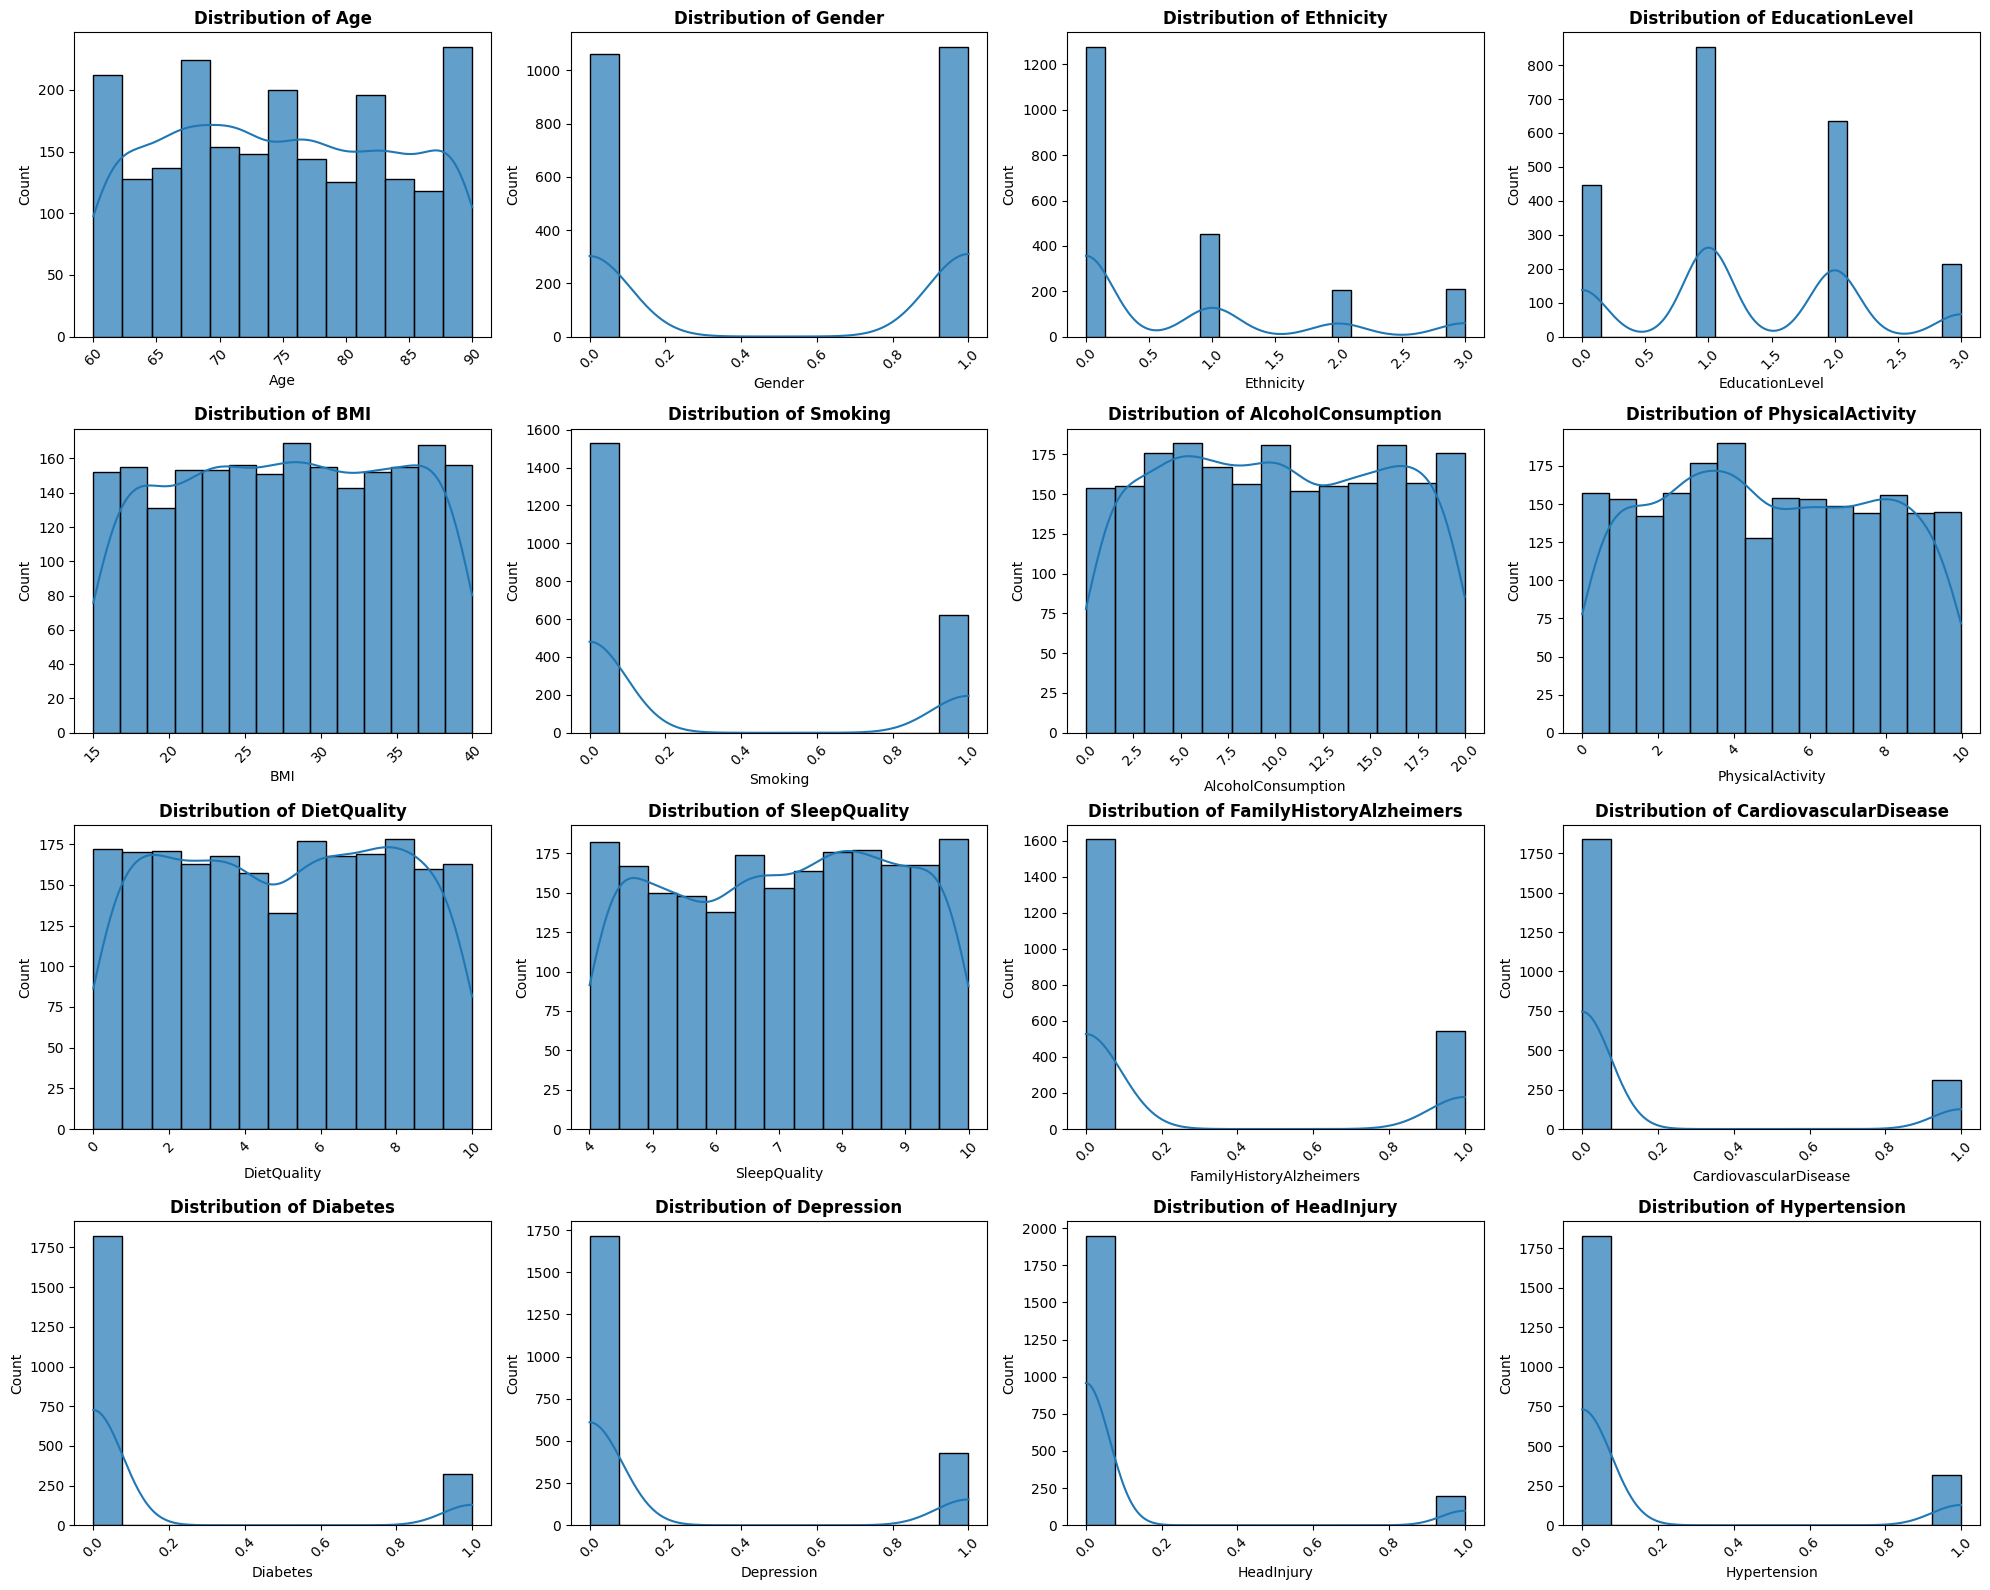

In [ ]:
# 1. Distribution Analysis
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    if idx < len(axes):
        if df[col].dtype in ['object']:
            # Categorical variables
            df[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        else:
            # Numerical variables
            sns.histplot(data=df, x=col, kde=True, ax=axes[idx], alpha=0.7)
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')

        axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(df.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

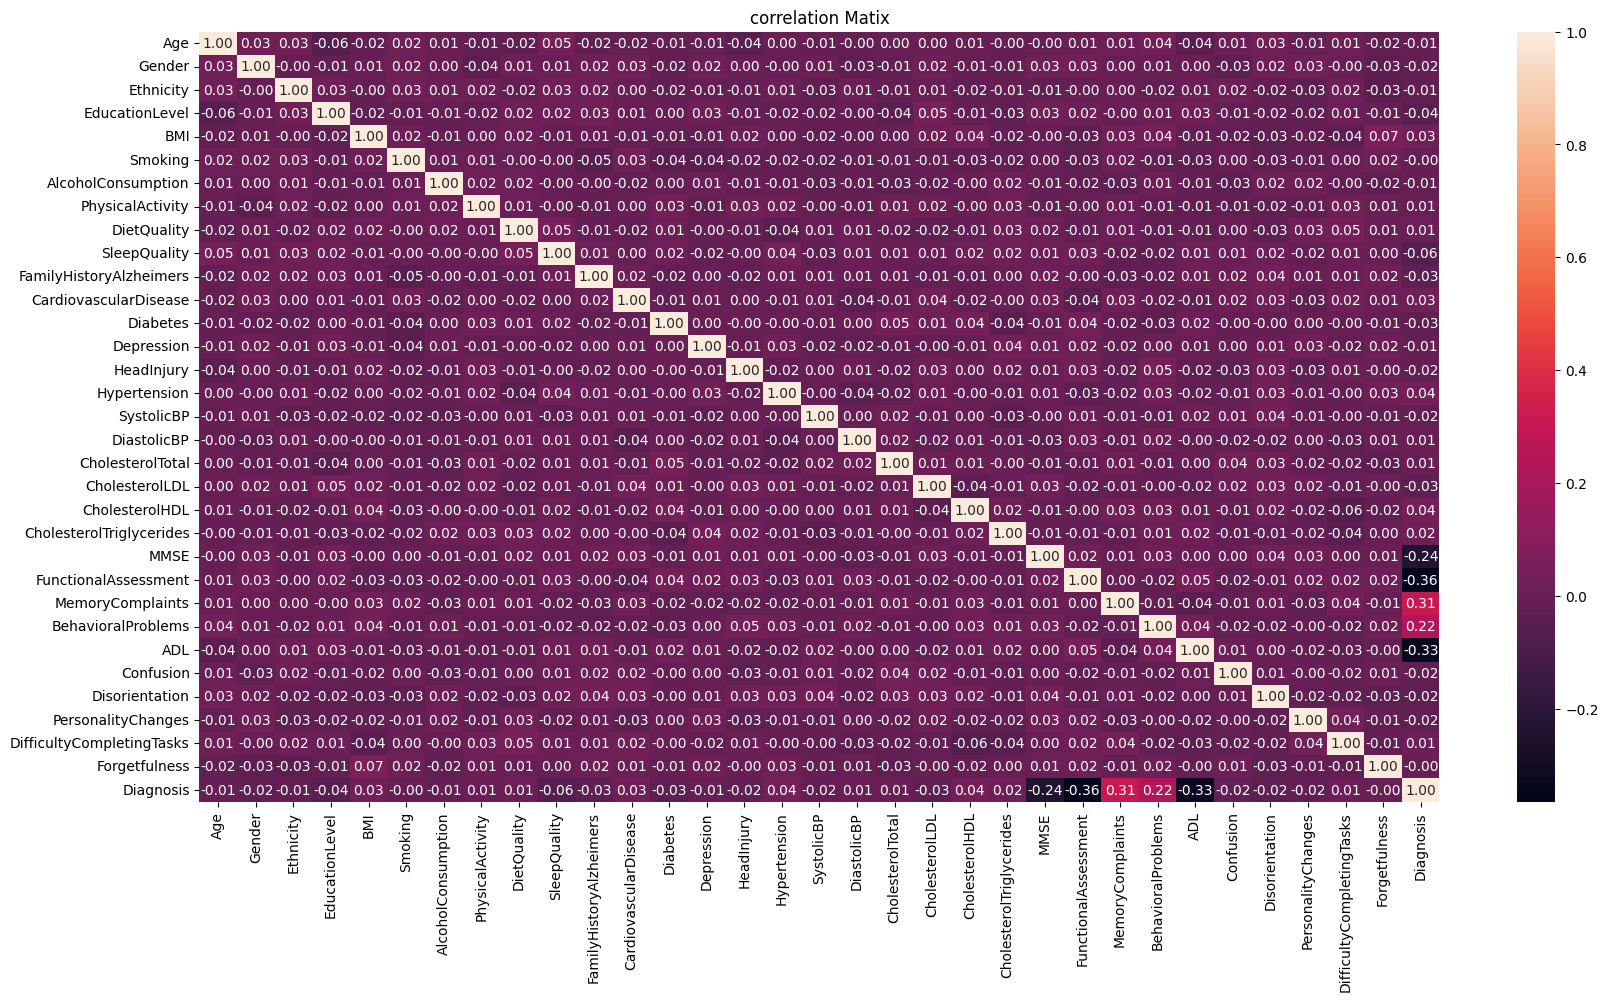

In [ ]:
plt.figure(figsize=(20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("correlation Matix")
plt.show()

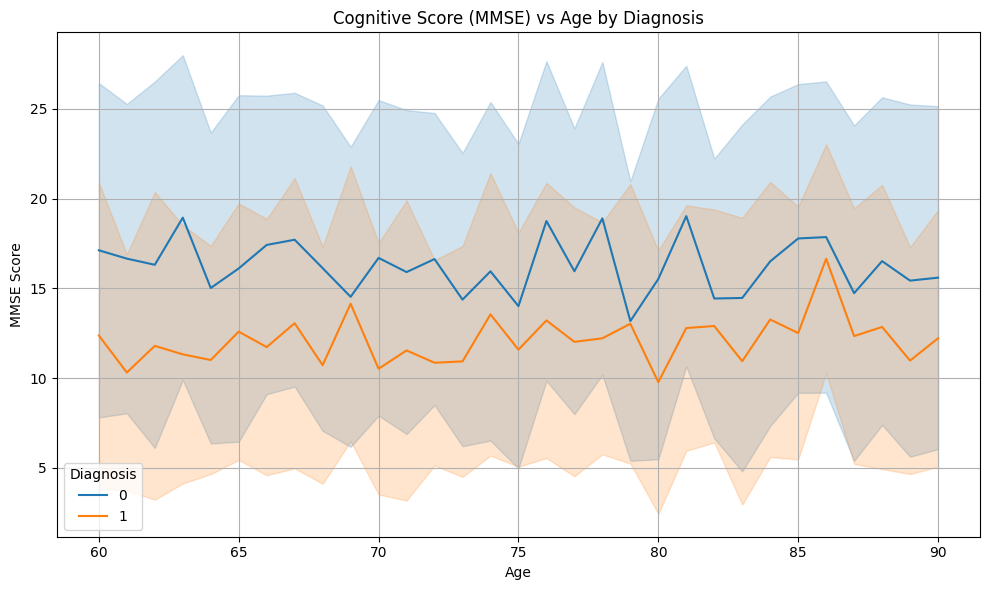

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='MMSE', hue='Diagnosis', ci='sd', palette='tab10')
plt.title("Cognitive Score (MMSE) vs Age by Diagnosis")
plt.xlabel("Age")
plt.ylabel("MMSE Score")
plt.grid(True)
plt.tight_layout()
plt.show()

#

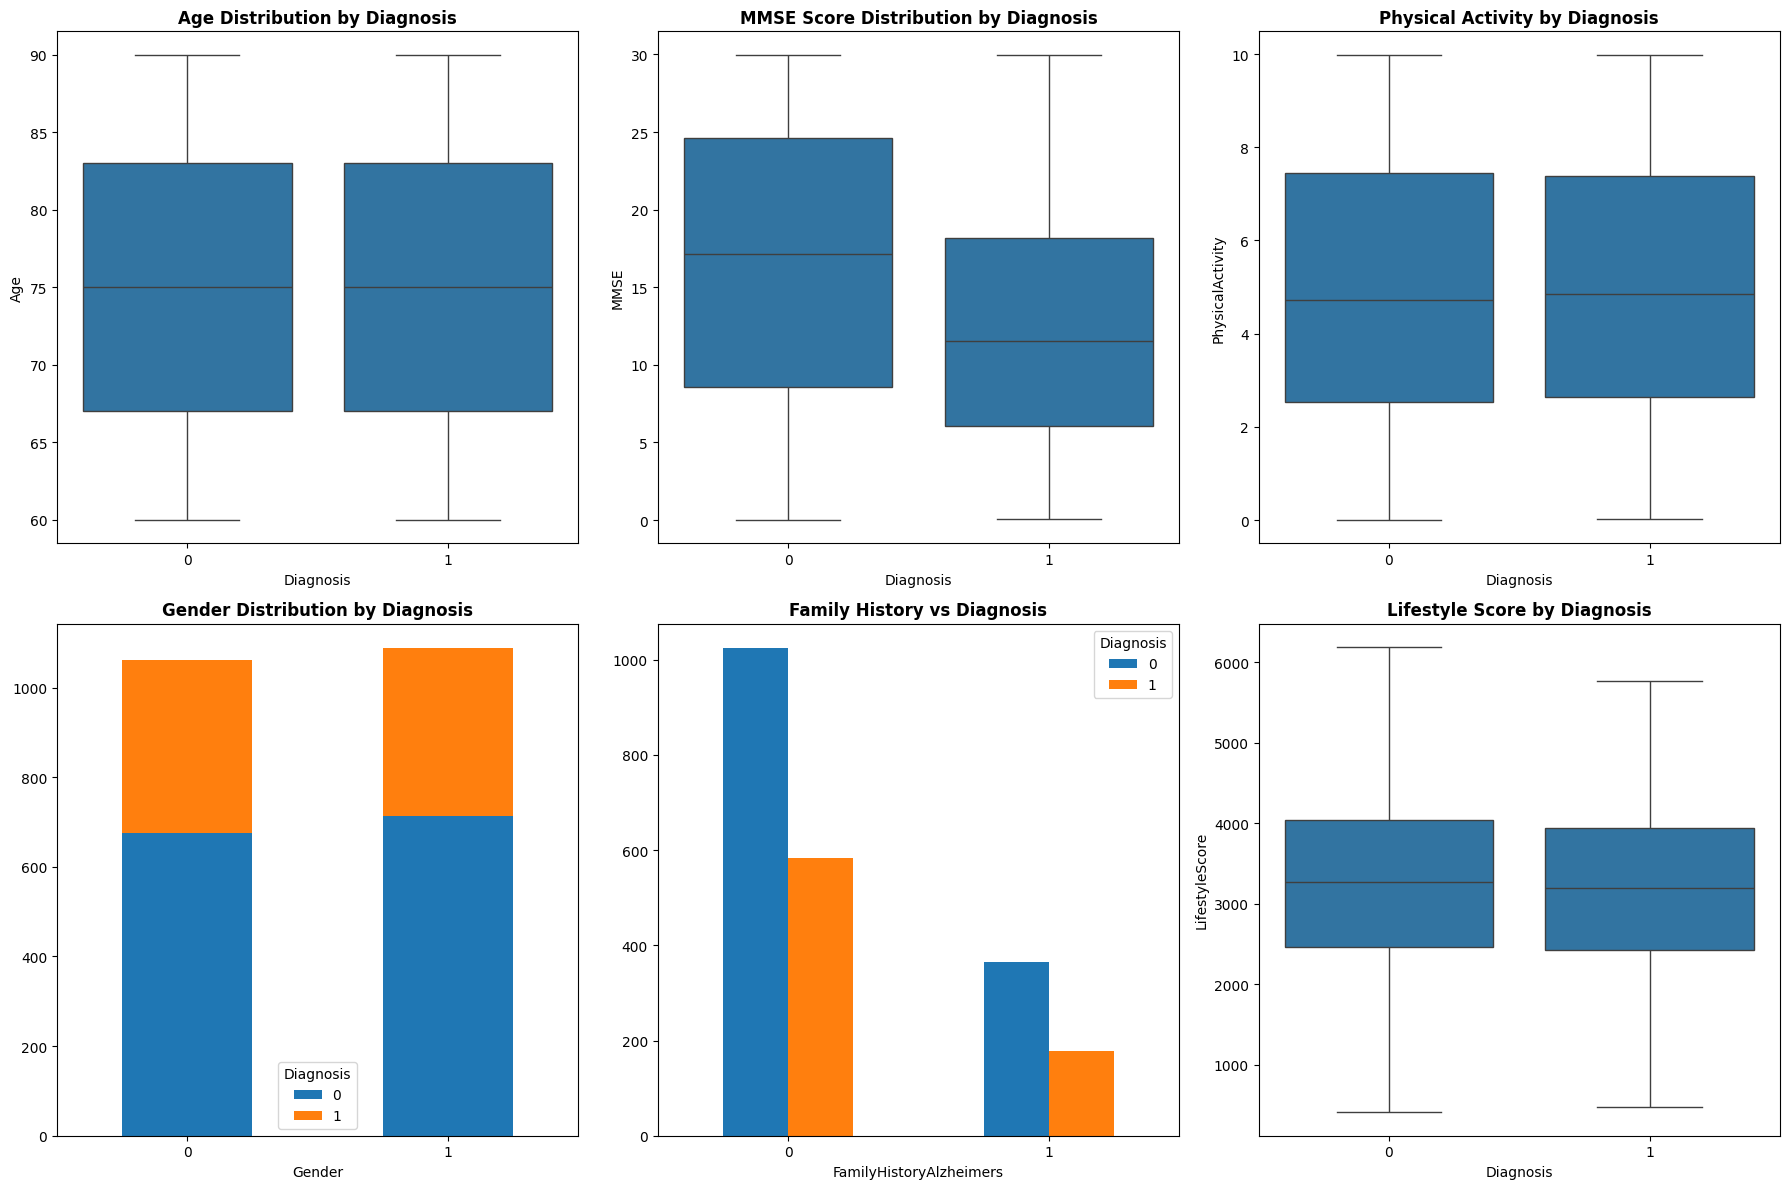

In [ ]:
# 3. Target Variable Relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

le = LabelEncoder()
# Age vs Diagnosis
sns.boxplot(data=df, x='Diagnosis', y='Age', ax=axes[0])
axes[0].set_title('Age Distribution by Diagnosis', fontweight='bold')
# MMSE vs Diagnosis
sns.boxplot(data=df, x='Diagnosis', y='MMSE', ax=axes[1])
axes[1].set_title('MMSE Score Distribution by Diagnosis', fontweight='bold')

# Physical Activity vs Diagnosis
sns.boxplot(data=df, x='Diagnosis', y='PhysicalActivity', ax=axes[2])
axes[2].set_title('Physical Activity by Diagnosis', fontweight='bold')

# Gender distribution
pd.crosstab(df['Gender'], df['Diagnosis']).plot(kind='bar', ax=axes[3], stacked=True)
axes[3].set_title('Gender Distribution by Diagnosis', fontweight='bold')
axes[3].tick_params(axis='x', rotation=0)

# Family History
pd.crosstab(df['FamilyHistoryAlzheimers'], df['Diagnosis']).plot(kind='bar', ax=axes[4])
axes[4].set_title('Family History vs Diagnosis', fontweight='bold')
axes[4].tick_params(axis='x', rotation=0)

# Lifestyle factors
lifestyle_cols = ['Smoking', 'AlcoholConsumption', 'DietQuality', 'SleepQuality']
if all(col in df.columns for col in lifestyle_cols):
    # Create a lifestyle score
    lifestyle_encoded = df[lifestyle_cols].copy()
    for col in lifestyle_cols:
        lifestyle_encoded[col] = le.fit_transform(df[col])

    df['LifestyleScore'] = lifestyle_encoded.sum(axis=1)
    sns.boxplot(data=df, x='Diagnosis', y='LifestyleScore', ax=axes[5])
    axes[5].set_title('Lifestyle Score by Diagnosis', fontweight='bold')

plt.tight_layout()
plt.show()

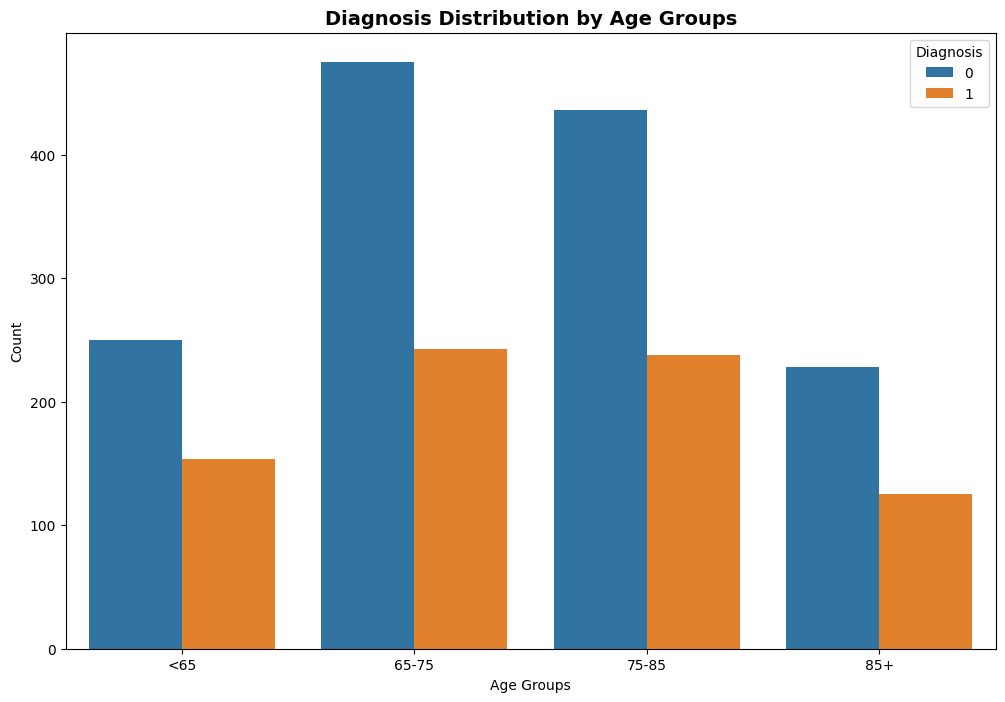

<Figure size 1200x600 with 0 Axes>

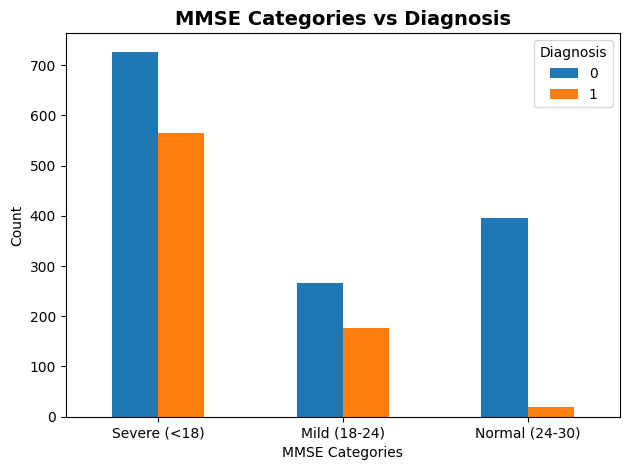

In [ ]:
# 4. Feature Analysis
# Age groups analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 65, 75, 85, 100],
                       labels=['<65', '65-75', '75-85', '85+'])

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='AgeGroup', hue='Diagnosis')
plt.title('Diagnosis Distribution by Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

# MMSE Score categories
df['MMSECategory'] = pd.cut(df['MMSE'], bins=[0, 18, 24, 30],
                           labels=['Severe (<18)', 'Mild (18-24)', 'Normal (24-30)'])

plt.figure(figsize=(12, 6))
pd.crosstab(df['MMSECategory'], df['Diagnosis']).plot(kind='bar', stacked=False)
plt.title('MMSE Categories vs Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('MMSE Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


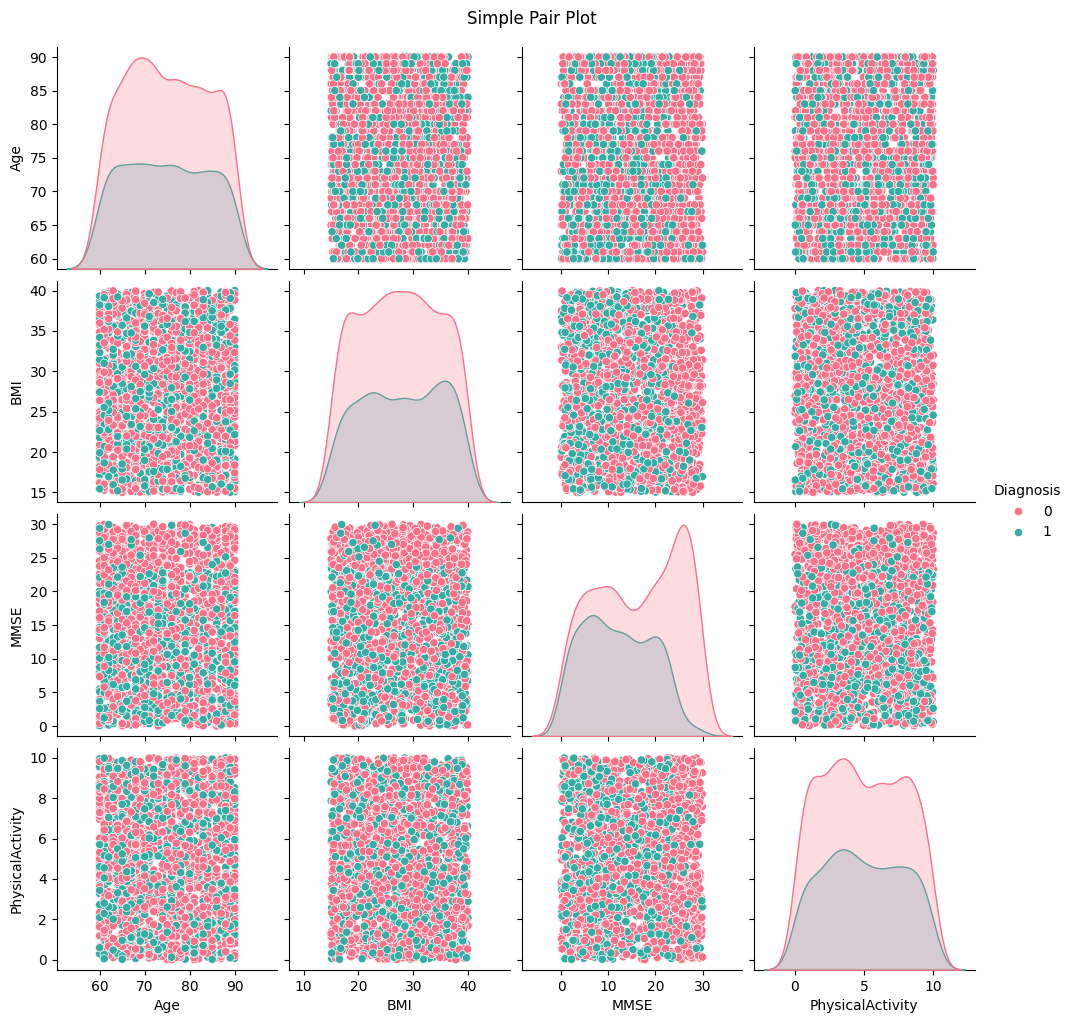

In [ ]:
features = df[['Age', 'BMI', 'MMSE', 'PhysicalActivity', 'Diagnosis']]
sns.pairplot(features, hue='Diagnosis' , palette='husl')
plt.suptitle('Simple Pair Plot', y=1.02)
plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'LifestyleScore', 'AgeGroup',
       'MMSECategory'],
      dtype='object')

# ***Preprocessing***

In [ ]:
# Create interaction features
if 'Age' in df.columns and 'MMSE' in df.columns:
    df['Age_MMSE_Interaction'] = df['Age'] * df['MMSE']

# Create risk scores
if 'FamilyHistoryAlzheimers' in df.columns:
    # Risk factors combination
    risk_factors = ['FamilyHistoryAlzheimers']
    if 'Smoking' in df.columns:
        risk_factors.append('Smoking')


# Health score (combining positive health indicators)
health_factors = []
if 'PhysicalActivity' in df.columns:
    health_factors.append('PhysicalActivity')
if 'DietQuality' in df.columns:
    health_factors.append('DietQuality')
if 'SleepQuality' in df.columns:
    health_factors.append('SleepQuality')

if health_factors:
    df['HealthScore'] = df[health_factors].sum(axis=1)

In [ ]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,LifestyleScore,AgeGroup,MMSECategory,Age_MMSE_Interaction,HealthScore
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1,0,0,3505,65-75,Mild (18-24),1566.837863,16.700005
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,0,1,0,1678,85+,Mild (18-24),1834.580790,15.289944
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,1,0,1,0,0,4532,65-75,Severe (<18),537.006150,19.344897
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,0,0,0,0,4458,65-75,Severe (<18),1035.343416,24.256159
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,1,1,0,0,2725,85+,Severe (<18),1203.067192,12.703196


In [ ]:
#  Final Data Preparation
# Separate features and target
# Drop 'AgeGroup' and 'MMSECategory' before creating features
X = df.drop(['Diagnosis', 'AgeGroup', 'MMSECategory'], axis=1)
y = df['Diagnosis']

# Handle any remaining categorical columns in features
# The code below already handles categorical features by encoding them
categorical_features = X.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    print(f"Remaining categorical features: {list(categorical_features)}")
    for col in categorical_features:
        X[col] = LabelEncoder().fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\nFinal dataset shape: {X_scaled_df.shape}")
print(f"Features: {list(X_scaled_df.columns)}")


Final dataset shape: (2149, 35)
Features: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'LifestyleScore', 'Age_MMSE_Interaction', 'HealthScore']


# ***Split Data***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ***SVM Model***
* ***Accuracy***
* ***Confusion Matrix***

In [ ]:
svc =SVC(kernel='linear', gamma=10, C=1)
svc.fit(X_train,y_train)

SVC(C=1, gamma=10, kernel='linear')

In [ ]:
y_pred_svc=svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))

0.8209302325581396


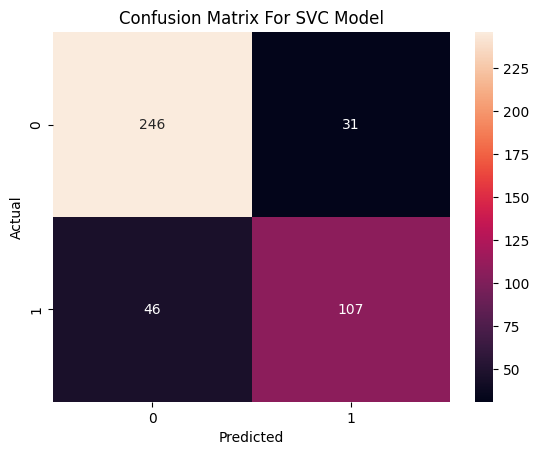

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc) , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For SVC Model')
plt.show()

# ***Random Forest Classifier***
* ***Accuracy***
* ***Confusion Matrix***
* ***Saving Model***

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))

0.9279069767441861


In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       298
           1       0.83      0.96      0.89       132

    accuracy                           0.93       430
   macro avg       0.91      0.94      0.92       430
weighted avg       0.94      0.93      0.93       430



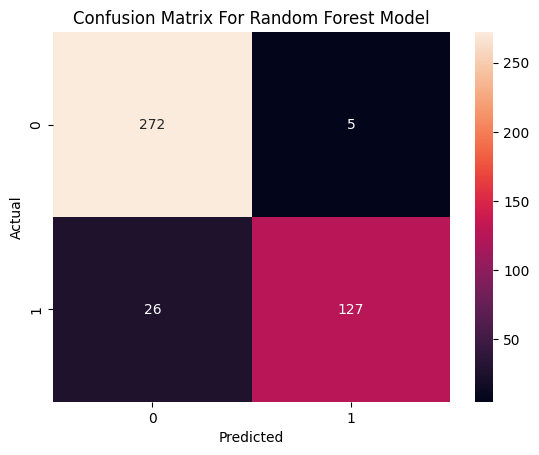

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

In [ ]:
import pickle
pickle.dump(rf,open("RandomForestClassifier.pkl","wb"))

# ***KNN Classifier***
* ***Accuracy***
* ***Confusion Matrix***

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = KNN.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7418604651162791


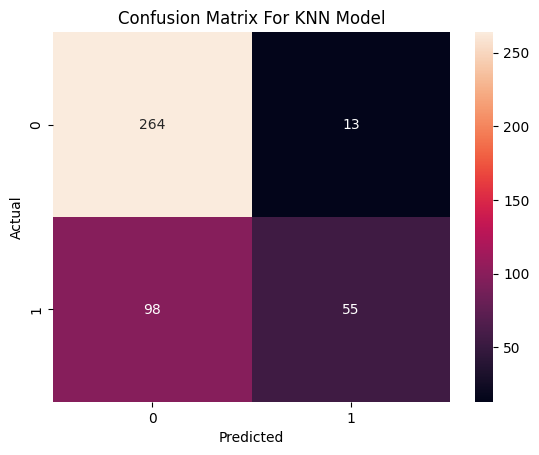

In [ ]:
sns.heatmap( confusion_matrix(y_test,y_pred) , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For KNN Model')
plt.show()

# ***XGBClassifier***
* ***Accuracy***
* ***Confusion Matrix***
* ***Saving Model***

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))

0.9511627906976744


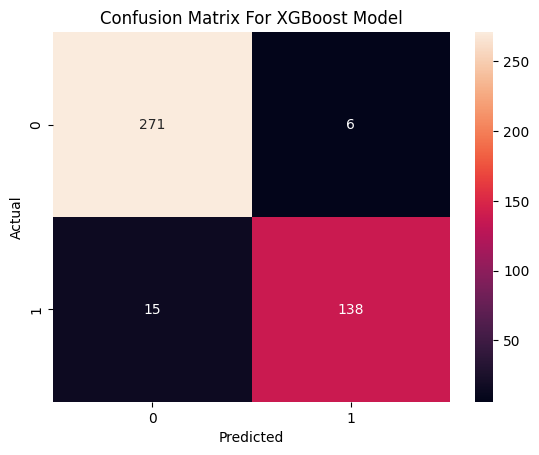


Classification Report For XGBoost Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb) , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For XGBoost Model')
plt.show()

# Print classification report for Accuracy, Precision, Recall, and F1-score
print("\nClassification Report For XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
pickle.dump(xgb_model ,open("XGBClassifier.pkl","wb"))

#  ***The Best Model***

* ***XGBClassifier with Accuracy 0.958***
* ***Random Forest Classifier with Accuracy 0.925***
